In [1]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
train_data = pd.read_csv('train_data.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64381 entries, 0 to 64380
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Timestamp                              64381 non-null  object 
 1   PT N2 'C' Speed                        64381 non-null  float64
 2   Gear High Speed Drive End X Vibr       64381 non-null  float64
 3   Gear High Speed Drive End Y Vibr       64381 non-null  float64
 4   Gear High Speed Non-Drive End X Vibr   64381 non-null  float64
 5   Gear High Speed Non-Drive End Y Vibr   64381 non-null  float64
 6   Gear LS Shaft Axial Displ 1            64381 non-null  float64
 7   Gear LS Shaft Axial Displ 2            64381 non-null  float64
 8   Gear Low Speed Drive End X Vibr        64381 non-null  float64
 9   Gear Low Speed DriveEnd Y Vibr         64381 non-null  float64
 10  Gear Low Speed Non-Drive End X Vibr    64381 non-null  float64
 11  Ge

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

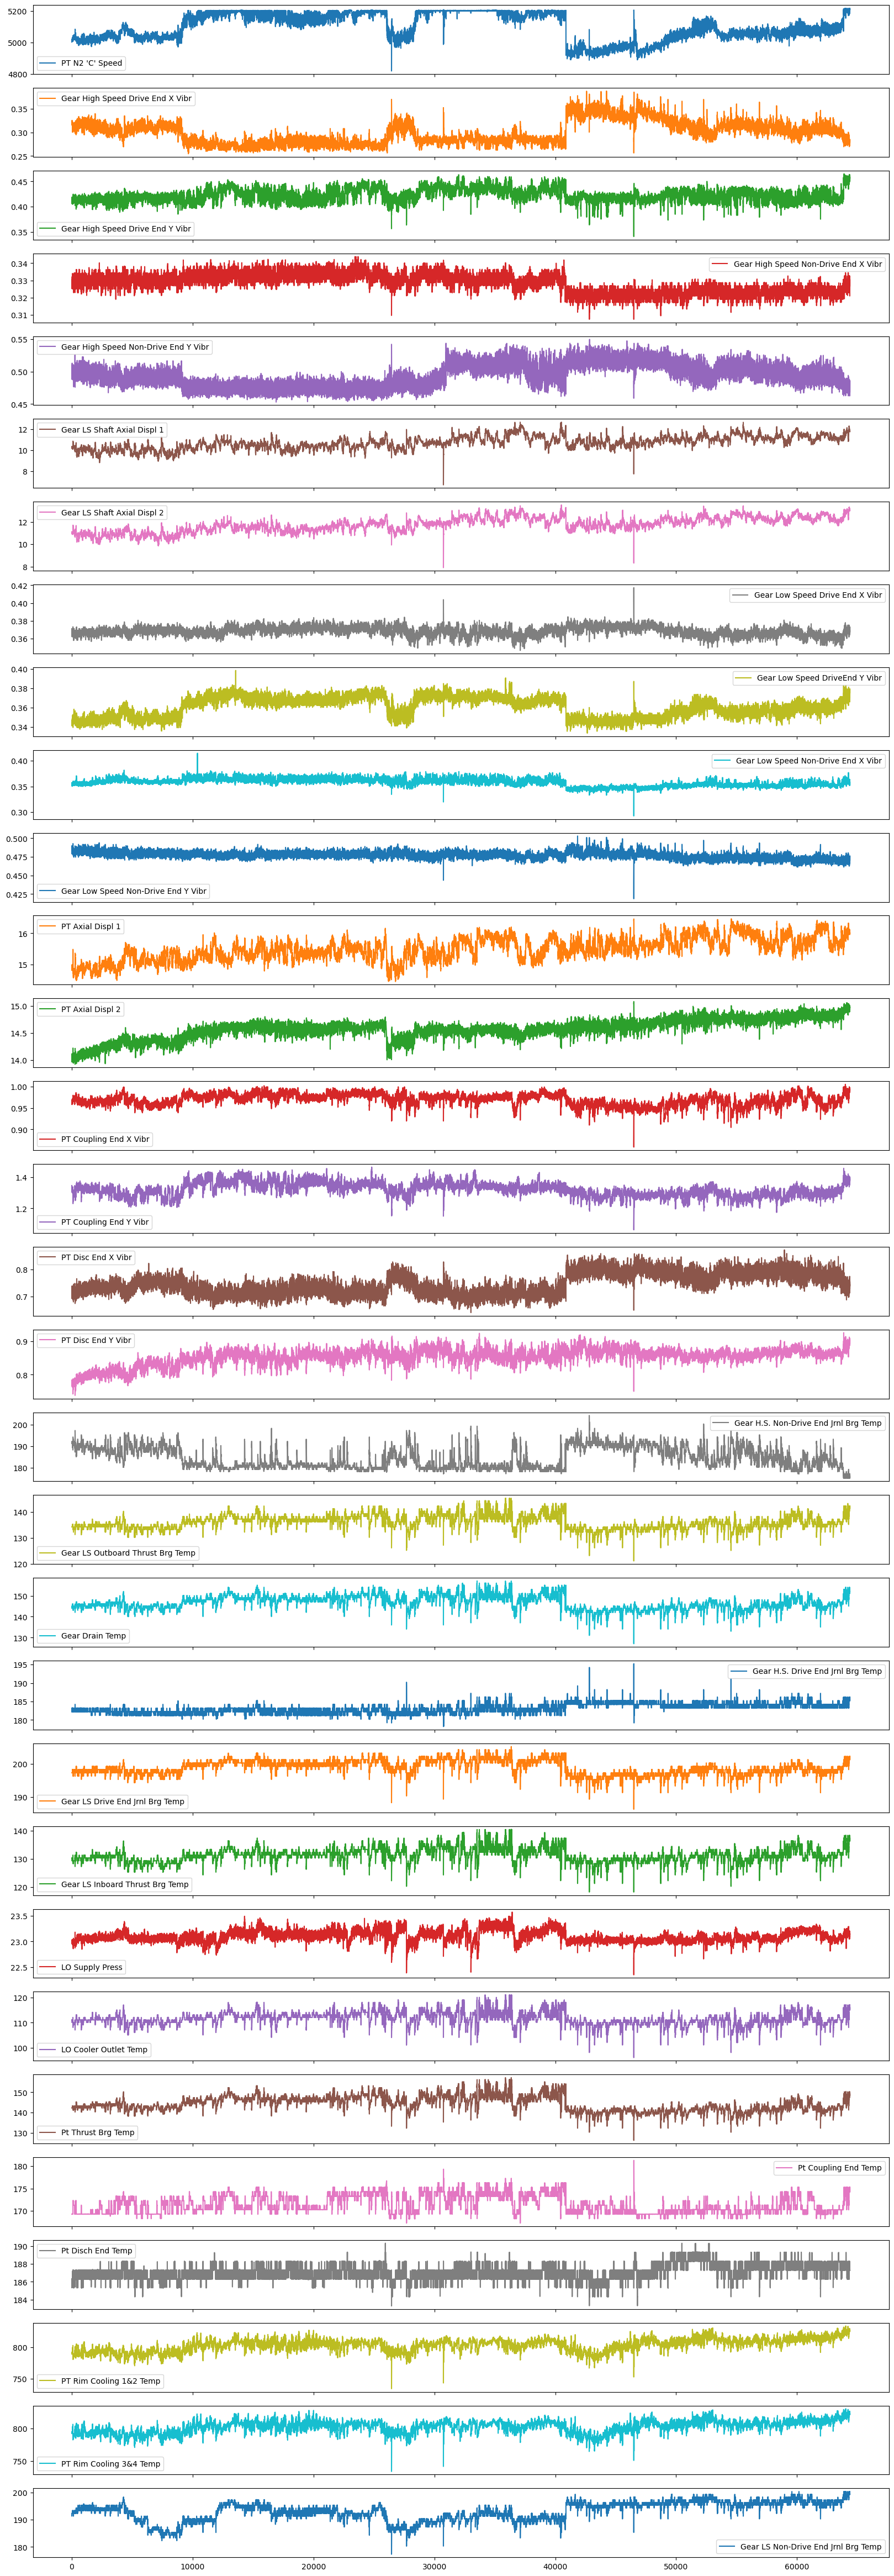

In [3]:
train_data.plot(subplots=True, figsize=(20,60))

In [4]:
train_data_t = train_data.drop('Timestamp',axis=1)
train_data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64381 entries, 0 to 64380
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PT N2 'C' Speed                        64381 non-null  float64
 1   Gear High Speed Drive End X Vibr       64381 non-null  float64
 2   Gear High Speed Drive End Y Vibr       64381 non-null  float64
 3   Gear High Speed Non-Drive End X Vibr   64381 non-null  float64
 4   Gear High Speed Non-Drive End Y Vibr   64381 non-null  float64
 5   Gear LS Shaft Axial Displ 1            64381 non-null  float64
 6   Gear LS Shaft Axial Displ 2            64381 non-null  float64
 7   Gear Low Speed Drive End X Vibr        64381 non-null  float64
 8   Gear Low Speed DriveEnd Y Vibr         64381 non-null  float64
 9   Gear Low Speed Non-Drive End X Vibr    64381 non-null  float64
 10  Gear Low Speed Non-Drive End Y Vibr    64381 non-null  float64
 11  PT

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

features = train_data_t.columns.to_list()
# Define scaler dictionary
features_scaler = {}

for col in features:
    # define MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    # scaler = StandardScaler()
    # fit and transform data with scaler for all features selected
    data_scale = scaler.fit_transform(train_data_t[col].values.reshape(-1,1))
    data_scale = np.reshape(data_scale, len(data_scale))
    features_scaler['scaler_'+ col] = scaler
    train_data_t[col] = data_scale

# delete unused variable and flush memory
del data_scale
del col
gc.collect()

60

In [6]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

def denoise_autoencoder_model(dimension):
    model = Sequential()
    model.add(Dense(30, input_dim=dimension, activation='relu'))
    model.add(Dense(18,activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(18,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(dimension, activation='linear'))
    model.compile(loss='mse', optimizer=optimizers.Adam(0.0005))
    return model

model_dae = denoise_autoencoder_model(len(features))
model_dae.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                960       
                                                                 
 dense_1 (Dense)             (None, 18)                558       
                                                                 
 dense_2 (Dense)             (None, 5)                 95        
                                                                 
 dense_3 (Dense)             (None, 18)                108       
                                                                 
 dense_4 (Dense)             (None, 30)                570       
                                                                 
 dense_5 (Dense)             (None, 31)                961       
                                                                 
Total params: 3,252
Trainable params: 3,252
Non-trainabl

In [7]:
from keras.callbacks import EarlyStopping

model_dae.fit(train_data_t.values, train_data_t.values, epochs=30, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=5)])

Epoch 1/30
2012/2012 [==============================] - 7s 3ms/step - loss: 0.0153
Epoch 2/30
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0041
Epoch 3/30
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0031
Epoch 4/30
2012/2012 [==============================] - 5s 3ms/step - loss: 0.0028
Epoch 5/30
2012/2012 [==============================] - 5s 3ms/step - loss: 0.0026
Epoch 6/30
2012/2012 [==============================] - 5s 3ms/step - loss: 0.0025
Epoch 7/30
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 8/30
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0023
Epoch 9/30
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0023
Epoch 10/30
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 11/30
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 12/30
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0022
E

In [8]:
prediction = model_dae.predict(train_data_t, verbose=1)

2012/2012 [==============================] - 2s 1ms/step


In [9]:
pred = pd.DataFrame(prediction)

In [10]:
for i, col in enumerate(features):
    # define MinMaxScaler
    scaler = features_scaler['scaler_'+ col]
    # fit and transform data with scaler for all features selected
    data_scale = scaler.inverse_transform(train_data_t[col].values.reshape(-1,1))
    data_scale = np.reshape(data_scale, len(data_scale))
    train_data_t[col] = data_scale

    data_scale = scaler.inverse_transform(pred[i].values.reshape(-1,1))
    data_scale = np.reshape(data_scale, len(data_scale))
    pred[i] = data_scale

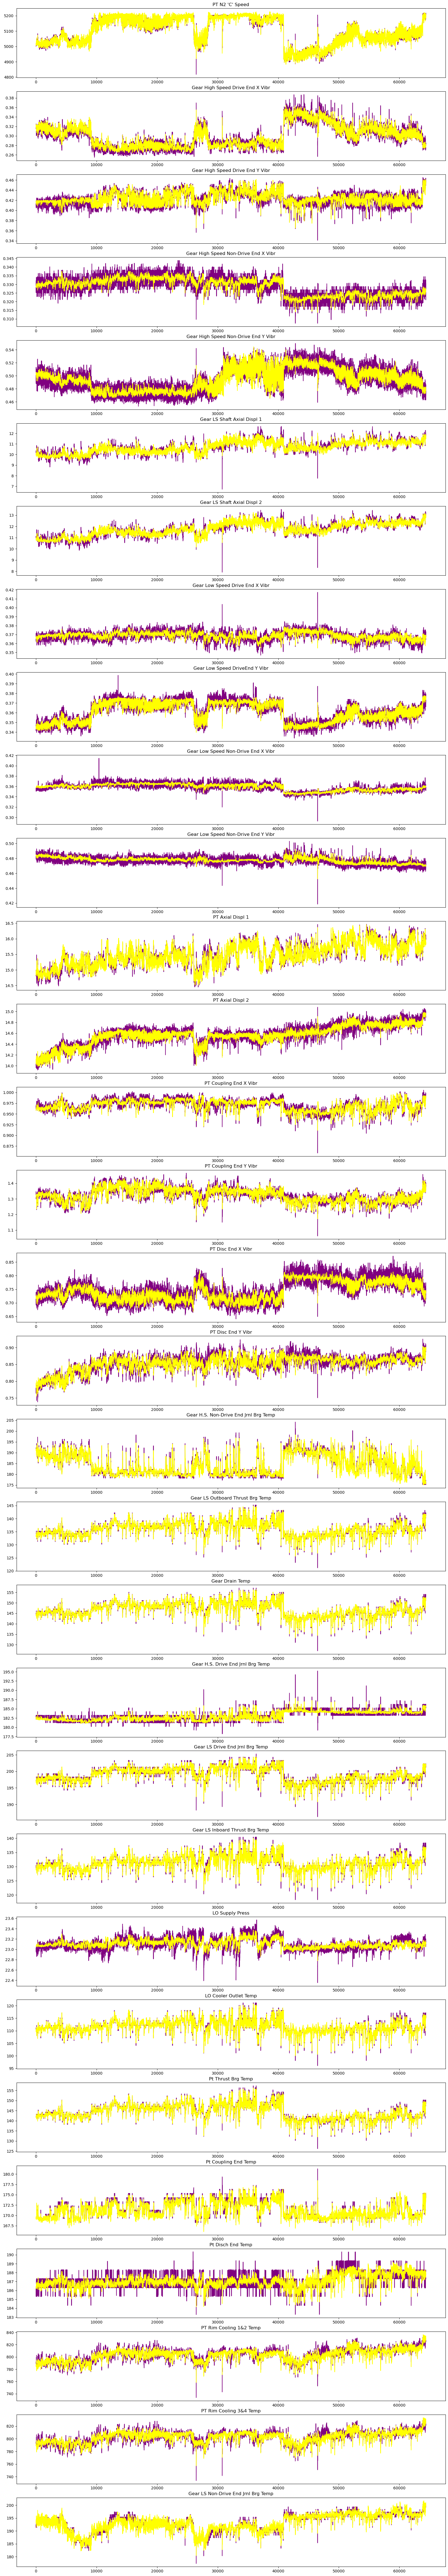

In [11]:
fig, axs = plt.subplots(nrows=31, figsize=(20,120))
for i, col in enumerate(features):
    axs[i].plot(train_data_t[col], color='purple')
    axs[i].plot(pred[i], color='yellow')
    axs[i].set_title(features[i])
plt.show()

In [12]:
train_data_denoise = pd.DataFrame(pred.values, columns=features)
train_data_denoise.to_csv('train_data_denoise.csv')